In [54]:
import pydicom
import matplotlib.pyplot as plt
import numpy as np

In [55]:
path = "C:/Users/taaha/Downloads/ct_nonequi_tilt/164515-00000014.dcm"
path = "C:/Users/taaha/Downloads/manifest-OtXaMwL56190865641215613043/QIN LUNG CT/QIN-LSC-0055/07-27-2003-1-CT Thorax wo Contrast-86597/5.000000-THORAX WO  3.0  B41 Soft Tissue-77621/1-016.dcm"
ds = pydicom.read_file(path)
ds

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 194
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.14519.5.2.1.4320.7007.188842186243229494803643357508
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002, 0013) Implementation Version Name         SH: 'dcm4che-1.4.34'
-------------------------------------------------
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL', 'CT_SOM5 SPI']
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.14519.5.2.1.4320.7007.188842186243229494803643357508
(0008, 0020) Study Date                          DA: '20030727'
(0008, 0021) Seri

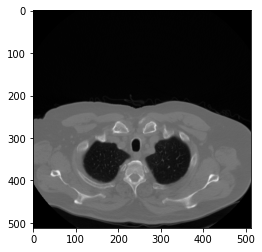

In [56]:
plt.imshow(ds.pixel_array, cmap = 'gray')

In [57]:
ds.pixel_array[0, 0].dtype

dtype('uint16')

In [58]:
unique = np.unique(ds.pixel_array)
len(unique)

2022

In [59]:
data = ds.pixel_array.tobytes()
# v = (data[i + 1] << 8) | data[i]
len(data)

524288

In [60]:
primary = data[1::2]
secondary = data[0::2]



In [61]:
# primary = bytearray()
# secondary = bytearray()

# for pixel in ds.pixel_data.flatten():

# 	a = (0x0000ff00 & pixel) >> 8
# 	b = (0x000000ff & pixel)

# 	back = int(np.int16(a << 8 | b))

# 	# print(a, b, pixel, back)

# 	primary.append(a)
# 	secondary.append(b)

# data_bytes = primary + secondary
# print(len(data_bytes), len(primary), len(secondary))
# # print(data_bytes)

In [62]:
from pydicom import dcmread
from pydicom.data import get_testdata_file
from pydicom.uid import RLELossless

original_size = os.path.getsize(path)

arr = ds.pixel_array
ds.compress(RLELossless, arr, encoding_plugin = 'pylibjpeg')
saved_to = f"C:/Users/taaha/Downloads/rle_ct_dataset/164515-00000014.dcm"
ds.save_as(saved_to)

size = os.path.getsize(saved_to)
print(original_size, size)
ratio = original_size / size
print(ratio)


527310 290726
1.8137696662837173
